## mapping tests 

In [10]:
import sys,os,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import random
from snipgenie import trees, app, snp_typing
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [11]:
counties = gpd.read_file('https://github.com/dmnfarrell/snipgenie/raw/master/maps/ireland_counties.zip?raw=true')

In [12]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
meta = meta[meta.county=='Wicklow']

In [13]:
def make_points(n=5, bounds=(1,1,50,50)):
    """Make points"""

    points = []
    minx, miny, maxx, maxy = bounds
    while len(points) < n:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        points.append(pnt)
    return points


In [14]:
wick = counties[counties.NAME_TAG=='Wicklow']

## make fake data for map/db testing

In [15]:
sdist = pd.read_csv('/storage/btbgenie/wicklow_results/snpdist.csv',index_col=0)
#print (sdist)

#find closest 

def find_neighbours(x, n=4):
    """find neighbours from snp distance matrix"""
  
    vals = list(x.sort_values()[1:n].index)
    return ';'.join(vals)

nearest = sdist.apply(find_neighbours,1)
#nearest

In [32]:
np.random.randint(1, 6, new.shape[0])

array([1, 3, 4, 5, 1, 5, 5, 3, 5, 4, 2, 4, 3, 5, 3, 4, 4, 5, 2, 4, 4, 2,
       4, 3, 3, 2, 4, 1, 2, 1, 1, 1, 2, 1, 2, 4, 2, 3, 3, 5, 2, 4, 1, 3,
       2, 2])

In [34]:
#make some points with fake data
pts = make_points(len(meta),(-6.7,52.8,-6.1,53.2))
new = gpd.GeoDataFrame(geometry= gpd.GeoSeries(pts), crs="EPSG:4326")
new.index = list(meta['sample'])
new['name'] = new.index
new['species'] = list(meta['species'])
new['spoligotype'] = 'SB0054'
new['clade'] = np.random.randint(1, 5, new.shape[0])
new['LONG'] = new.geometry.x
new['LAT'] = new.geometry.y

#add some SNP data
new['nearest'] = nearest
print (new)
snpm = pd.read_csv('/storage/btbgenie/wicklow_results/core.txt',sep=' ').set_index('pos').T

#encode snp data into field - use for ..?

#s = snp_typing.encode_snps(x)
new.to_csv('wicklow_test.csv')


                            geometry       name species spoligotype  clade      LONG        LAT                        nearest
1034       POINT (-6.35077 52.96896)       1034     Dog      SB0054      3 -6.350770  52.968955  39-MBovis;49-MBovis;19-MBovis
13-11594   POINT (-6.50976 52.84877)   13-11594    Deer      SB0054      2 -6.509757  52.848770  17-MBovis;43-MBovis;44-MBovis
14-MBovis  POINT (-6.62152 53.11731)  14-MBovis    Deer      SB0054      1 -6.621523  53.117307  37-MBovis;51-MBovis;56-MBovis
15-11643   POINT (-6.12748 53.18448)   15-11643    Deer      SB0054      4 -6.127477  53.184484   19-11957;36-MBovis;49-MBovis
17-11662   POINT (-6.43972 53.04126)   17-11662    Deer      SB0054      2 -6.439717  53.041259        ref;49-MBovis;19-MBovis
17-MBovis  POINT (-6.50948 53.05730)  17-MBovis    Deer      SB0054      2 -6.509482  53.057296   43-MBovis;13-11594;44-MBovis
19-11957   POINT (-6.51406 52.83232)   19-11957    Deer      SB0054      4 -6.514058  52.832322   15-11643;36-M

<AxesSubplot:>

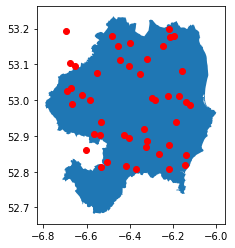

In [146]:
fig,ax=plt.subplots(1,1)
wick.plot(ax=ax)
new.plot(ax=ax,color='r')

In [86]:
points.to_file('wicklow_points.shp')

In [112]:
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [ ]:
coordinate = (53.4, -6.5)
m = folium.Map(
    tiles='cartodbpositron',
    zoom_start=8,
    location=coordinate,
    width=500,
    height=500
)
#folium.TileLayer(tiles='Stamen Terrain',name="Stamen Terrain").add_to(m)
folium.LayerControl().add_to(m)
m.add_child(MeasureControl())

gdf = gpd.read_file('wicklow_points.shp')
gjson = gdf.to_json()
#points = folium.features.GeoJson(gjson)
#m.add_child(points)
#fg = folium.map.FeatureGroup()

for i,v in gdf.iterrows():    
    cm = folium.CircleMarker(location = [v.geometry.y, 
                                    v.geometry.x],
                           radius = 5,
                           weight = 1,
                           tooltip = v['name'],
                           color = 'red',
                           fill_color = '#ffeda0',
                           fill_opacity = 0.7,
                           fill = True)
  
    cm.add_to(m)
m

In [4]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook

from bokeh.tile_providers import CARTODBPOSITRON, get_provider
output_notebook()


Loading BokehJS ...

In [6]:
tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)